# **1. 로지스틱 회귀(Logistic Regression)**

* 둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification) 이라고 한다.
* 로지스틱 회귀는 이진 분류를 풀기 위한 대표적인 알고리즘이다.
* 연산에는 시그모이드 함수를 사용한다. (sigmoid(Wx + b))
> 시그모이드 함수는 제공되기 때문에, 수식으로 사용할 필요가 없다.

In [114]:
import numpy as np
import matplotlib.pyplot  as plt

In [115]:
def sigmoid(x) : 
  return 1/(1 + np.exp(-x))
  # exp = 자연지수 e^

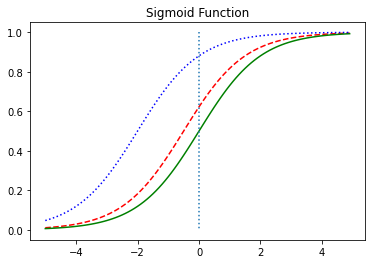

In [116]:
x = np.arange(-5.0, 5.0, 0.1) # -5 ~ 5 까지 0.1 씩 증가
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x)
y3 = sigmoid(x + 2)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='dotted')
plt.plot([0.0, 0.0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

In [117]:
# sigmoid 그래프에 mse 비용함수를 적용하게 된다면 : 올바른 학습결과가 나오지 않음 (선형이 아니기 때문)
# 따라서, 다른 cost 함수를 사용해야 한다.

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [118]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [119]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [120]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)

In [121]:
# H = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
H = torch.sigmoid(x_train.matmul(W) + b) # 시그모이드 함수를 통한 간단한 가설식
print(H)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [122]:
# 하나의 샘플(원소) 에 대한 오차를 구하는 식 = 오차함수
loss = -(y_train[0] * torch.log(H[0]) + (1 - y_train[0]) * torch.log(1 - H[0]))
print(f'{loss.item():.4f}')

0.6931


In [123]:
# 모든 원소에 대한 오차를 구하는 식
loss = -(y_train * torch.log(H) + (1 - y_train) * torch.log(1 - H))
print(loss)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [124]:
cost = loss.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [125]:
# binary_cross_entropy() : 로지스틱 회귀의 비용함수를 제공한다.
loss = F.binary_cross_entropy(H, y_train)
print(f'{loss:.4f}')

0.6931


In [126]:
x_data = [[1, 2], 
          [2, 3],
          [3, 1], 
          [4, 3], 
          [5, 3], 
          [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)

optimizer = optim.SGD([W, b], lr=1)

tot_epoch = 1000
for epoch in range(tot_epoch + 1) : 

  H = torch.sigmoid(x_train.matmul(W) + b)
  cost = F.binary_cross_entropy(H, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0 : 
    print(f'Epoch {epoch}/{tot_epoch}, Cost:{cost:.6f}')

Epoch 0/1000, Cost:0.693147
Epoch 100/1000, Cost:0.134722
Epoch 200/1000, Cost:0.080643
Epoch 300/1000, Cost:0.057900
Epoch 400/1000, Cost:0.045300
Epoch 500/1000, Cost:0.037261
Epoch 600/1000, Cost:0.031672
Epoch 700/1000, Cost:0.027556
Epoch 800/1000, Cost:0.024394
Epoch 900/1000, Cost:0.021888
Epoch 1000/1000, Cost:0.019852


In [127]:
H = torch.sigmoid(x_train.matmul(W) + b)
print(H)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [128]:
pred = H >= torch.FloatTensor([0.5])
print(pred)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


# **2. nn.Module 로 구현**

In [129]:
x_data = [[1, 2], 
          [2, 3],
          [3, 1], 
          [4, 3], 
          [5, 3], 
          [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [130]:
# 시퀀셜 모델 : 모델 안에 nn.Module 레이어를 차례로 쌓아 간단한 딥러닝 모델을 만들 수 있게 도와주는 함수
model = nn.Sequential(
    nn.Linear(2, 1), # input 디멘션 : 2, output 디멘션 = 1
    nn.Sigmoid()
)

In [131]:
optimizer = optim.SGD(model.parameters(), lr=1)

In [132]:
model(x_train)

tensor([[0.5667],
        [0.6602],
        [0.6987],
        [0.7874],
        [0.8365],
        [0.8678]], grad_fn=<SigmoidBackward0>)

In [133]:
tot_epoch = 1000
for epoch in range(tot_epoch + 1) : 

  H = model(x_train) # 모델에 입력되면 시그모이드 과정을 거치기 때문
  cost = F.binary_cross_entropy(H, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0 : 
    pred = H >= torch.FloatTensor([0.5])
    correct_pred = pred.float() == y_train
    accuracy = correct_pred.sum().item() / len(correct_pred)
    print(f'Epoch {epoch}/{tot_epoch}, Accuracy:{accuracy * 100:2.2f}% Cost:{cost:.6f}')

Epoch 0/1000, Accuracy:50.00% Cost:0.612429
Epoch 100/1000, Accuracy:100.00% Cost:0.132695
Epoch 200/1000, Accuracy:100.00% Cost:0.079931
Epoch 300/1000, Accuracy:100.00% Cost:0.057538
Epoch 400/1000, Accuracy:100.00% Cost:0.045080
Epoch 500/1000, Accuracy:100.00% Cost:0.037113
Epoch 600/1000, Accuracy:100.00% Cost:0.031566
Epoch 700/1000, Accuracy:100.00% Cost:0.027476
Epoch 800/1000, Accuracy:100.00% Cost:0.024332
Epoch 900/1000, Accuracy:100.00% Cost:0.021838
Epoch 1000/1000, Accuracy:100.00% Cost:0.019811


In [134]:
model(x_train)

tensor([[2.7506e-04],
        [3.1546e-02],
        [3.8895e-02],
        [9.5630e-01],
        [9.9824e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

In [135]:
print(list(model.parameters()))
# 기울기값, 절편 등을 출력할 수 있다.

[Parameter containing:
tensor([[3.2550, 1.5190]], requires_grad=True), Parameter containing:
tensor([-14.4913], requires_grad=True)]


# **3. 클래스의 형태로 모델 구현**

In [136]:
class BinaryClassifier(nn.Module) : 
  def __init__(self) : 
    super().__init__()
    self.linear = nn.Linear(2, 1)
    self.sigmoid = nn.Sigmoid()
  
  def forward(self, x) : 
    return self.sigmoid(self.linear(x))

In [137]:
x_data = [[1, 2], 
          [2, 3],
          [3, 1], 
          [4, 3], 
          [5, 3], 
          [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [138]:
model = BinaryClassifier()

In [139]:
tot_epoch = 1000

optimizer = optim.SGD(model.parameters(), lr=1)

for epoch in range(tot_epoch + 1) : 

  H = model(x_train) # 모델에 입력되면 시그모이드 과정을 거치기 때문
  cost = F.binary_cross_entropy(H, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0 : 
    pred = H >= torch.FloatTensor([0.5])
    correct_pred = pred.float() == y_train
    accuracy = correct_pred.sum().item() / len(correct_pred)
    print(f'Epoch {epoch}/{tot_epoch}, Accuracy:{accuracy * 100:2.2f}% Cost:{cost:.6f}')

Epoch 0/1000, Accuracy:50.00% Cost:1.215973
Epoch 100/1000, Accuracy:100.00% Cost:0.132649
Epoch 200/1000, Accuracy:100.00% Cost:0.079914
Epoch 300/1000, Accuracy:100.00% Cost:0.057530
Epoch 400/1000, Accuracy:100.00% Cost:0.045075
Epoch 500/1000, Accuracy:100.00% Cost:0.037110
Epoch 600/1000, Accuracy:100.00% Cost:0.031564
Epoch 700/1000, Accuracy:100.00% Cost:0.027474
Epoch 800/1000, Accuracy:100.00% Cost:0.024330
Epoch 900/1000, Accuracy:100.00% Cost:0.021837
Epoch 1000/1000, Accuracy:100.00% Cost:0.019810


In [153]:
model = nn.Linear(1, 1)

# 일반 선형회귀 모델을 클래스의 형태로 구현
class LinearRegressionModel(nn.Module) : 
  def __init__(self) : 
    super().__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    return self.linear(x)

model = LinearRegressionModel()

x_train = torch.FloatTensor([[1], [2], [3], [4]])
y_train = torch.FloatTensor([[50], [70], [90], [85]]) 

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

tot_epoch = 2000
for epoch in range(tot_epoch + 1) : 
 
  H = model(x_train)
  cost = F.mse_loss(H, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 출력
  if epoch % 100 == 0 : # 100 번 마다
    print(f'Epoch {epoch:4d}/{tot_epoch} Cost : {cost.item():.6f}')

Epoch    0/2000 Cost : 5382.771484
Epoch  100/2000 Cost : 151.518311
Epoch  200/2000 Cost : 104.322952
Epoch  300/2000 Cost : 78.413246
Epoch  400/2000 Cost : 64.189178
Epoch  500/2000 Cost : 56.380241
Epoch  600/2000 Cost : 52.093239
Epoch  700/2000 Cost : 49.739716
Epoch  800/2000 Cost : 48.447681
Epoch  900/2000 Cost : 47.738422
Epoch 1000/2000 Cost : 47.349030
Epoch 1100/2000 Cost : 47.135193
Epoch 1200/2000 Cost : 47.017853
Epoch 1300/2000 Cost : 46.953407
Epoch 1400/2000 Cost : 46.918022
Epoch 1500/2000 Cost : 46.898666
Epoch 1600/2000 Cost : 46.887966
Epoch 1700/2000 Cost : 46.882133
Epoch 1800/2000 Cost : 46.878929
Epoch 1900/2000 Cost : 46.877174
Epoch 2000/2000 Cost : 46.876190


In [154]:
# 다중 선형회귀 모델을 클래스의 형태로 구현

model = nn.Linear(3, 1)

class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self) : 
    super().__init__()
    self.linear = nn.Linear(3, 1)

  def forward(self, x):
    return self.linear(x)

model = MultivariateLinearRegressionModel()

x_train = torch.FloatTensor([[2, 0, 0], 
                             [2, 1, 0], 
                             [2, 2, 1], 
                             [3, 1, 1], 
                             [4, 1, 2], 
                             [4, 2, 2]])
y_train = torch.FloatTensor([[50], [60], [65], [70], [75], [85]]) 

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

tot_epoch = 2000
for epoch in range(tot_epoch + 1) : 
 
  H = model(x_train)
  cost = F.mse_loss(H, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 출력
  if epoch % 100 == 0 : # 100 번 마다
    print(f'Epoch {epoch:4d}/{tot_epoch} Cost : {cost.item():.6f}')

Epoch    0/2000 Cost : 4472.626465
Epoch  100/2000 Cost : 140.728394
Epoch  200/2000 Cost : 101.611794
Epoch  300/2000 Cost : 89.887535
Epoch  400/2000 Cost : 79.670631
Epoch  500/2000 Cost : 70.646828
Epoch  600/2000 Cost : 62.674908
Epoch  700/2000 Cost : 55.631313
Epoch  800/2000 Cost : 49.407085
Epoch  900/2000 Cost : 43.906082
Epoch 1000/2000 Cost : 39.043728
Epoch 1100/2000 Cost : 34.745251
Epoch 1200/2000 Cost : 30.944822
Epoch 1300/2000 Cost : 27.584259
Epoch 1400/2000 Cost : 24.612387
Epoch 1500/2000 Cost : 21.983873
Epoch 1600/2000 Cost : 19.658792
Epoch 1700/2000 Cost : 17.601875
Epoch 1800/2000 Cost : 15.781960
Epoch 1900/2000 Cost : 14.171563
Epoch 2000/2000 Cost : 12.746414
